In [1]:
df_grid_05 <- get(load('../3.Datos generados/dataframes/df_grid_05.Rdata'))
df_grid_1 <- get(load('../3.Datos generados/dataframes/df_grid_1.Rdata'))
df_grid_15 <- get(load('../3.Datos generados/dataframes/df_grid_15.Rdata'))
df_grid_2 <- get(load('../3.Datos generados/dataframes/df_grid_2.Rdata'))
df_grid_25 <- get(load('../3.Datos generados/dataframes/df_grid_25.Rdata'))
df_grid_3 <- get(load('../3.Datos generados/dataframes/df_grid_3.Rdata'))
df_grid_4 <- get(load('../3.Datos generados/dataframes/df_grid_4.Rdata'))
df_grid_5 <- get(load('../3.Datos generados/dataframes/df_grid_5.Rdata'))

df.series_grid_05 <- get(load('../3.Datos generados/dataframes/df.series_grid_05.Rdata'))
df.series_grid_1 <- get(load('../3.Datos generados/dataframes/df.series_grid_1.Rdata'))
df.series_grid_15 <- get(load('../3.Datos generados/dataframes/df.series_grid_15.Rdata'))
df.series_grid_2 <- get(load('../3.Datos generados/dataframes/df.series_grid_2.Rdata'))
df.series_grid_25 <- get(load('../3.Datos generados/dataframes/df.series_grid_25.Rdata'))
df.series_grid_3 <- get(load('../3.Datos generados/dataframes/df.series_grid_3.Rdata'))
df.series_grid_4 <- get(load('../3.Datos generados/dataframes/df.series_grid_4.Rdata'))
df.series_grid_5 <- get(load('../3.Datos generados/dataframes/df.series_grid_5.Rdata'))


lista_df <- list(df_grid_05,
df_grid_1,
df_grid_15,
df_grid_2,
df_grid_25,
df_grid_3 ,
df_grid_4,
df_grid_5)

lista_df_series <- list(
df.series_grid_05,
df.series_grid_1,
df.series_grid_15,
df.series_grid_2,
df.series_grid_25,
df.series_grid_3,
df.series_grid_4,
df.series_grid_5)

In [2]:
for (i in 1:length(lista_df)){
    df_grid <- lista_df[[i]]
    for (row in 1:nrow(df_grid)){
        if (is.nan(df_grid$FBA[row])){
            df_grid$FBA[row] = NA
            df_grid$FsOrNot[row] = NA
            df_grid$C[row] = NA
            df_grid$P[row] = NA
        }else if (df_grid$FBA[row] == 0){
            df_grid$FsOrNot[row] = NA
            df_grid$C[row] = NA
            df_grid$P[row] = NA
        }
    }
    lista_df[[i]] <- df_grid
}

In [3]:
for (i in 1:length(lista_df_series)){
    df_grid_series <- lista_df_series[[i]]
    df_grid <- lista_df[[i]]
    for (row in 1:nrow(df_grid)){
        if (is.na(df_grid$FBA[row])){
            df_grid_series[row,3:14] <- NA
        }else if (df_grid$FBA[row] == 0){
            df_grid_series[row,3:14] <- NA
        }
    }
    lista_df_series[[i]] <- df_grid_series
}

In [31]:
library("visualizeR")

quantity2clim <- function(quantity, what, ref.grid, backperm = NULL) {
  if(!is.null(backperm)){quantity <- quantity[backperm]}
  mat <- matrix(quantity, nrow = 1)  
  ref.grid$Data <- mat2Dto3Darray(mat, x = ref.grid$xyCoords$x , y = ref.grid$xyCoords$y)
  attr(ref.grid$Data, "climatology:fun") <- what
  return(ref.grid)
}


Loading required package: transformeR




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.5) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

Warning message:
“no DISPLAY variable so Tk is not available”
visualizeR version 1.6.1 (2021-03-11) is loaded


Get the latest stable version (1.6.3) using <devtools::install_github('SantanderMetGroup/visualizeR')>

Please see 'citation("visualizeR")' to cite this package.



In [33]:
grid_05 <- get(load('../1.Upscaling/upscaling_ba/ba_grid_05.Rdata'))

In [42]:
C_clim <- quantity2clim(quantity = lista_df[[1]]$C, what = '', ref.grid =grid_05 , backperm = NULL)

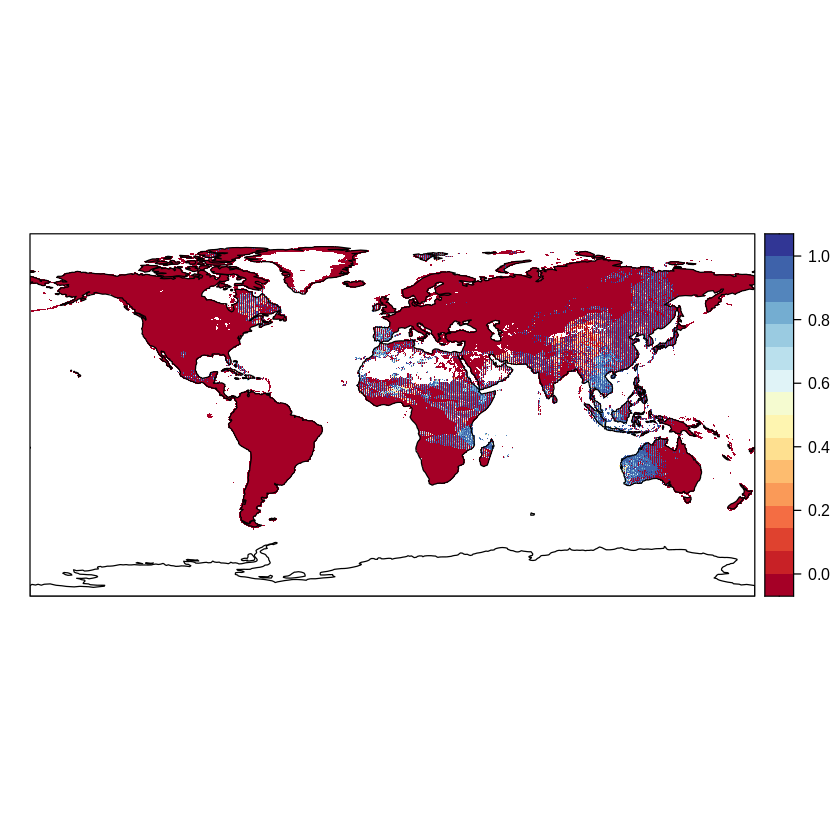

In [43]:
spatialPlot(C_clim,backdrop.theme = 'coastline')

In [6]:
nombres_grids <- c('df_grid_05.Rdata','df_grid_1.Rdata','df_grid_15.Rdata','df_grid_2.Rdata','df_grid_25.Rdata','df_grid_3.Rdata','df_grid_4.Rdata','df_grid_5.Rdata')
for (i in 1:length(lista_df)){
    df_grid_masked <- lista_df[[i]]
    ruta <- '../3.Generated data/dataframes/Con_FBA_masked/'
    save(df_grid_masked, file = paste0(ruta,nombres_grids[i]))
}